Epoch 1/5
782/782 [==============================] - 83s 104ms/step - loss: 0.6854 - accuracy: 0.5403 - val_loss: 0.6127 - val_accuracy: 0.6942
Epoch 2/5
782/782 [==============================] - 81s 103ms/step - loss: 0.6572 - accuracy: 0.6111 - val_loss: 0.6713 - val_accuracy: 0.5722
Epoch 3/5
782/782 [==============================] - 70s 90ms/step - loss: 0.6549 - accuracy: 0.6085 - val_loss: 0.6543 - val_accuracy: 0.6111
Epoch 4/5
782/782 [==============================] - 68s 87ms/step - loss: 0.6415 - accuracy: 0.6202 - val_loss: 0.6893 - val_accuracy: 0.5216
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6335 - accuracy: 0.6571
Test Accuracy: 0.6571


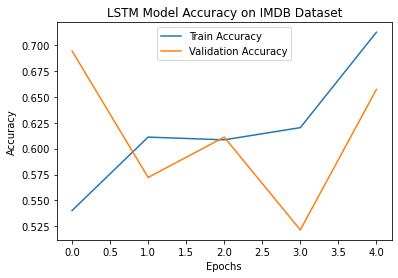

Predicted Sentiment: Negative (score: 0.2996)


'Negative'

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np

# Hyperparameters
vocab_size = 10000  # Vocabulary size
max_length = 200  # Maximum length of review
embedding_dim = 32  # Word embedding dimension
lstm_units = 64  # Number of LSTM units (controls model capacity)
batch_size = 32  # Batch size
num_epochs = 5  # Number of training epochs

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build the LSTM model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  # Word embeddings
    LSTM(lstm_units, activation='tanh'),  # LSTM layer (replaces SimpleRNN)
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Model Accuracy on IMDB Dataset')
plt.show()




In [ ]:
# Function to preprocess and predict sentiment
def predicted_sentiment(text, model):
    tokenizer = Tokenizer(num_words=vocab_size)
    sequence = tokenizer.texts_to_sequences([text])  # Convert text to sequence
    padding_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')  # Pad sequence
    prediction = model.predict(padding_sequence)[0][0]  # Get model prediction
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    print(f"Predicted Sentiment: {sentiment} (score: {prediction:.4f})")
    return sentiment

# Example usage
input_text = "This movie was very bad!"
predicted_sentiment(input_text, model)

Predicted Sentiment: Negative (score: 0.2996)


'Negative'